In [13]:
import os

import numpy as np
import pandas as pd
import tensorflow as tf
from keras.optimizers import Adam
from keras.utils import to_categorical
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras import layers
from keras.models import Sequential
import matplotlib.pyplot as plt
import json


In [3]:
data_dir = 'data3/'

batch_size = 32
img_height = 224
img_width = 224

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


class_names = train_ds.class_names



Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


#### Confirm that the shape is correct

In [4]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


#### Improve performance

In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### Standardize the data

In [6]:
normalization_layer = layers.Rescaling(1./255)


#### Create the model

In [7]:
num_classes = len(class_names)


model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])


#### Train the model

In [8]:
epochs=10

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 51s 529ms/step - loss: 1.4768 - accuracy: 0.4227 - val_loss: 1.1009 - val_accuracy: 0.5572
Epoch 2/10
92/92 [==============================] - 48s 517ms/step - loss: 1.0237 - accuracy: 0.5954 - val_loss: 0.9879 - val_accuracy: 0.6035
Epoch 3/10
92/92 [==============================] - 47s 514ms/step - loss: 0.8317 - accuracy: 0.6945 - val_loss: 0.9105 - val_accuracy: 0.6471
Epoch 4/10
92/92 [==============================] - 47s 515ms/step - loss: 0.5987 - accuracy: 0.7881 - val_loss: 0.9904 - val_accuracy: 0.6376
Epoch 5/10
92/92 [==============================] - 47s 515ms/step - loss: 0.3996 - accuracy: 0.8604 - val_loss: 0.9888 - val_accuracy: 0.6540
Epoch 6/10
92/92 [==============================] - 48s 521ms/step - loss: 0.2331 - accuracy: 0.9213 - val_loss: 1.2310 - val_accuracy: 0.6349
Epoch 7/10
92/92 [==============================] - 48s 527ms/step - loss: 0.1168 - accuracy: 0.9608 - val_loss: 1.4003 - val_accuracy: 0.6376

#### Save the model to external file

In [17]:
model.save("flower_model.h5")

#### Save the classnames separately in a json file

In [14]:
with open('class_names.json', 'w') as f:
  json.dump(class_names, f)

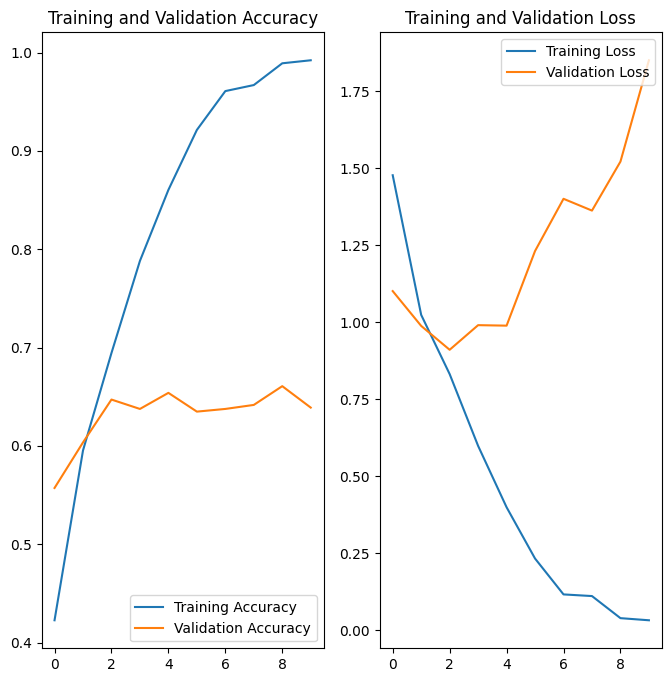

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

What ive learned:

Jupyter is very nice
Chat GPT is great but not all you need
That alot of images in each column is required